# Importing Libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the dataset

In [18]:
data=pd.read_csv("Position_Salaries.csv")

Checking for null values

In [19]:
print(data.isna().sum())

Position    0
Level       0
Salary      0
dtype: int64


In [20]:
print(data.head())

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


Removing duplicates....

In [21]:
print(data.size)

30


Dividing dataset into dependent and independent data

In [22]:
X=data.iloc[:,1:-1].values
Y=data.iloc[:,-1].values

We don't need to do the spliting here because we have vary less data which is 10 rows only.


# Feature Scaling...

In [23]:
from sklearn.preprocessing import StandardScaler
x_sc=StandardScaler()
y_sc=StandardScaler()

x_data=x_sc.fit_transform(X)
y_data=y_sc.fit_transform(Y.reshape(-1,1))

# Preparing Decision Tree Regression model...

In [24]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_data,y_data)

DecisionTreeRegressor()

Predicting the test data by using Regression model

In [25]:
y_pred=dtr.predict(y_data)
y_predict=y_sc.inverse_transform(y_pred.reshape(-1,1))

Comparing the original and predicted data.....

In [26]:
print(np.concatenate((Y.reshape(-1,1),y_predict.reshape(-1,1)),axis=1))

[[  45000.   60000.]
 [  50000.   60000.]
 [  60000.   80000.]
 [  80000.   80000.]
 [ 110000.   80000.]
 [ 150000.   80000.]
 [ 200000.  110000.]
 [ 300000.  150000.]
 [ 500000.  300000.]
 [1000000. 1000000.]]


Predicting random_data....

In [27]:
print(y_sc.inverse_transform(dtr.predict(x_sc.transform([[8.5]])).reshape(-1,1)))

[[300000.]]


## Visualising the Decision tree regression results

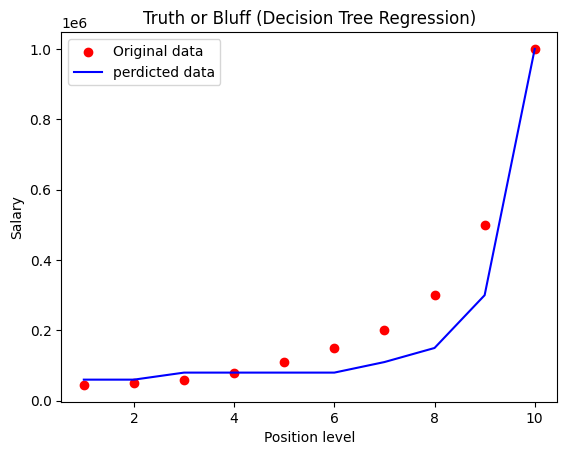

In [28]:
plt.scatter(X,Y,color="red",label="Original data")
plt.plot(X,y_predict,color="blue",label="perdicted data")
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend()
plt.show()

## Visualising the Drecision tree regression results (for higher resolution and smoother curve)

<ipython-input-29-bdd63ad159cf>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid=np.arange(min(X),max(X),0.1)


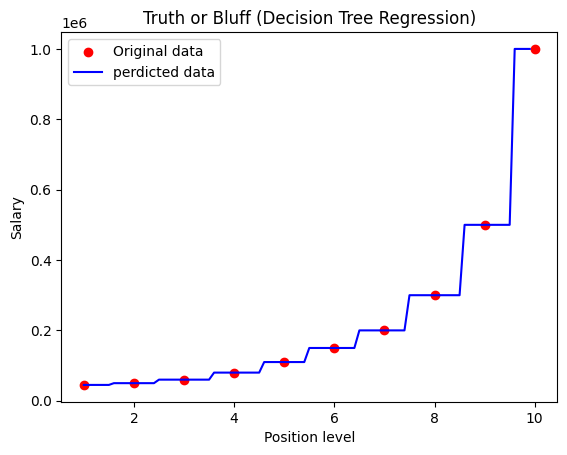

In [29]:
x_grid=np.arange(min(X),max(X),0.1)
x_grid=x_grid.reshape(-1,1)
plt.scatter(X,Y,color="red",label="Original data")
plt.plot(x_grid,y_sc.inverse_transform(dtr.predict(x_sc.transform(x_grid)).reshape(-1,1)),color="blue",label="perdicted data")
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [30]:
from sklearn.metrics import r2_score
print("Model Accuracy : ",r2_score(Y,y_predict))

Model Accuracy :  0.9043852607632443
